In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [64]:
data = pd.read_csv('./data/processed_data.csv',index_col=0)
X = data.drop(['medv'],axis = 1)
y = np.array(data['medv']).reshape(-1,1)

In [65]:
data

,crim,nox,rm,dis,lstat,medv
0,0.00632,0.538,6.575,4.0900,4.98,24.0
1,0.02731,0.469,6.421,4.9671,9.14,21.6
2,0.02729,0.469,7.185,4.9671,4.03,34.7
3,0.03237,0.458,6.998,6.0622,2.94,33.4
4,0.06905,0.458,7.147,6.0622,5.33,36.2
...,...,...,...,...,...,...
501,0.06263,0.573,6.593,2.4786,9.67,22.4
502,0.04527,0.573,6.120,2.2875,9.08,20.6
503,0.06076,0.573,6.976,2.1675,5.64,23.9
504,0.10959,0.573,6.794,2.3889,6.48,22.0


In [66]:
X.shape

(506, 5)

In [67]:
# standscaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
minmax_x = MinMaxScaler().fit(X)
minmax_y = MinMaxScaler().fit(y)

In [68]:
import joblib 
scaler_filename ="./x_scaler"
scaler_y = "y_scaler"
joblib.dump(minmax_x, scaler_filename)
joblib.dump(minmax_y, scaler_y)

# joblib.load()

['y_scaler']

In [69]:
X = minmax_x.transform(X)
y = minmax_y.transform(y)

In [70]:
y.shape

(506, 1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, np.squeeze(y), random_state=0) # 随机数种子：random_state

In [72]:
from sklearn.neural_network import MLPRegressor
# MLPRegressor(hidden_layer_sizes=(32,32), activation='relu',
#              solver='adam', alpha=0.0001, batch_size='auto', 
#              learning_rate='constant', learning_rate_init=0.001, 
#              power_t=0.5, max_iter=1000, shuffle=True, random_state=0, tol=0.0001, #early_stopping=True,
#              verbose=True).fit(X_train,y_train)

In [73]:


# 导入网格搜索交叉验证，网格搜索可以让模型参数按我们给定的列表遍历，找到效果最好的模型
# 交叉验证可以充分评估回归模型的准确性
from sklearn.model_selection import GridSearchCV

# 构造参数字典，我们让这三个参数按列表中的顺序排列组合遍历一遍
param_grid = {
    'hidden_layer_sizes':[(32),(32,32),(32,64,32),64,(64,64),(64,64,64)],# hidden layer
    'activation':['relu','logistic','tanh','identy'],# 最大树深，树太深会造成过拟合
    'max_iter':[500,1000,1500,3000] # 决策划分时考虑的最大特征数
}

# 实例化随机森林回归器
rf = MLPRegressor()

# 以随机森林回归器为基础构造网格搜索回归器
grid = GridSearchCV(rf, param_grid=param_grid, cv=3)  # 网格搜索交叉验证, 3折交叉验证

#在训练集上训练
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh', 'identy'],
                         'hidden_layer_sizes': [32, (32, 32), (32, 64, 32), 64,
                                                (64, 64), (64, 64, 64)],
                         'max_iter': [500, 1000, 1500, 3000]})

In [74]:
# 查看效果最好的模型
grid.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (64, 64, 64), 'max_iter': 3000}

In [75]:
# 制定模型为效果最好参数对应的模型
best_ml_reg = grid.best_estimator_

In [76]:
best_ml_reg

MLPRegressor(hidden_layer_sizes=(64, 64, 64), max_iter=3000)

In [77]:
model = best_ml_reg.fit(X_train,y_train)

In [78]:
y_pre = model.predict(X_test)

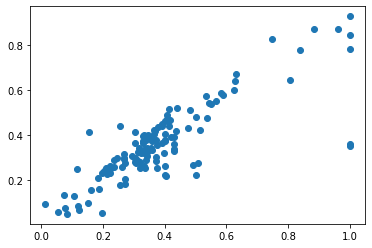

In [79]:
plt.scatter(y_test,y_pre)

In [80]:
from sklearn import metrics # metrics 评估指标模块
MSE = metrics.mean_squared_error(y_test, y_pre)

In [81]:
MSE

0.012640033283127928

In [82]:
# 保存模型
joblib.dump(model,'MLP.weight')

['MLP.weight']